## Прикладные методы математической статистики
### Домашнее задание 1. Вариант 4. Задача 2.
   **Студент:** Абу Аль Лабан Н. А.  
   **Группа:** БПИ 198
   
   ---
## **Тестирование последовательностей псевдослучайных чисел.** 
### **Цель:** 
Рализовать датчик псевдослучайных чисел и проверить генерируемую последовательность на равномерность и независимость.  
  
   **а)** Рассчитать $100$ псевдослучайных чисел степенным остаточным методом No1, с $z_1 = 1237$.  
   **б)** Привести первые $10$ чисел этой последовательности.  
   **в)** Построить гистограмму с $10$ столбцами для полученной последовательности.  
   **г)** Проверить гипотезу о том, что последовательность имеет распределение $R(0, 1)$ критерием хи-квадрат, разбив интервал $[0; 1)$ на десять равных интервалов.  
   **д)** Повторить шаги (в) и (г) для последовательности длиной в $10000$ чисел.  
   **е)** Проверить тестом перестановок первые $9999$ чисел последовательности, разбив их на тройки.  
      
   Использовать уровень значимости $5\%$.  
     
---

Подключим все необходимые для работы библиотеки 

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy import nsolve
import matplotlib.pyplot as plt
import random

#### Метод для генерации псевдослучайных чисел
    
Чтобы рассчитать псевдослучайные числа степенным остаточным методом No1, необходимо:
- Задать начальное число $z_1$
- Найти следующие числа по формуле $z_i = (z_{i-1}^{2.5} \text{ div } 100) \mod 10000$ 
- Уложить числа в интервал от 0 до 1 следующим образом: $x_i = \frac{z_i}{10000}$

In [2]:
def  generator(seed, count):
    numbers = [seed] # список случайных чисел
    # Генерирум числа и укладываем их в интервал от 0 до 1
    for i in range(1, count):
        numbers.append((numbers[i-1]**(2.5) // 100) % 10000)   
    for i in range(count):
        numbers[i] /= 10000 
    return numbers

---
#### a) Расчет псевдослучайных чисел
  
Рассчитаем массив 100 псевдослучайных чисел, воспользовавшись вышеописанным генератором

In [3]:
z = 1237 # начальное число

numbers100 = generator(z, 100)

In [4]:
print('Начальное число: {}'.format(z))
print('Сгенерировано псевдослучайных чисел: {}'.format(len(numbers100)))

Начальное число: 1237
Сгенерировано псевдослучайных чисел: 100


---
**б) Вывод первых 10 чисел последовательности**  

In [5]:
print('Первые числа последовательности: ')
display(pd.DataFrame([['z_{}'.format(i+1) for i in range(10)], numbers100[:10]],
                    columns=['' for i in range(10)],
                    index=['' for i in range(2)]))

Первые числа последовательности: 


,,,,,,,,,,
,z_1,z_2,z_3,z_4,z_5,z_6,z_7,z_8,z_9,z_10
,0.1237,0.8175,0.5381,0.0145,0.2531,0.2777,0.3868,0.4995,0.3508,0.8681


---
**в) Построение гистограммы с 10  столбцами для полученной последовательности**  

<function matplotlib.pyplot.show(close=None, block=None)>

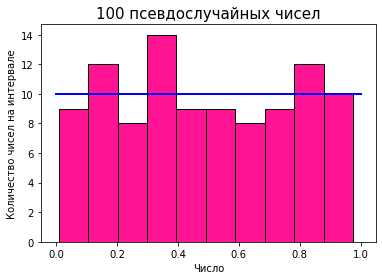

In [6]:
ax = plt.gca()
plt.title("100 псевдослучайных чисел",
          fontsize = 15,
          color = 'black') 
plt.xlabel(r'Число',
           color = 'black') 
plt.ylabel(r'Количество чисел на интервале',
           color = 'black') 

plt.plot([0,1], [10,10], color='blue', lw=2) 
n, bin, patches = plt.hist(numbers100, 
                           bins = 10,
                           color = 'deeppink', 
                           edgecolor = 'black', 
                           linewidth = 1) 
plt.show

---
**г) Проврка гипотезы**  

Необходимо проверить гипотезу о том, что последовательность имеет распределение $R(0, 1)$ критерием хи-квадрат, разбив интервал $[0; 1)$ на десять равных интервалов.  
  
Для начала определим основную и альтернативную гипотезы:  
- $H_0:$ последовательность имеет распределение $R(0, 1)$  
- $H_A:$ последовательность не распределена равномерно  
  
Зададим уровень значимости $\alpha = 0.05$ (см. условие)
  
Для проверки гипотезы применим **Критерий согласия Пирсона $\chi^2$**  

Нужно:
- Разбить диапазон изменения случайной величины на интервалы с шагом $0.1$  
- Вычислить наблюдаемые и теоретические частоты  
  
При равномерном распределении и делении на равные интервалы, на эти интерваы выпало бы равное количество значений.  
Значит, **теоретическая частота** равна $100 / 10 = 10$  

Для вычисления **наблюдаемых частот** в соответствующих интервалах посчитаем, сколько чисел последовательности попадает в каждый интервал
  
Для удобства определим функцию

In [7]:
def get_observed(numbers):
    observed = [0 for i in range(10)]

    # Вычисляем наблюдаемые частоты
    for n in numbers:
        observed[int(n*10)] += 1
    return observed

In [8]:
observed100 = get_observed(numbers100)

In [9]:
# Выводим результат
print('Наблюдаемые частоты на выборке из 100 элементов: ')
intervals = ['.{} - .{}'.format(i, i + 1) for i in range(9)]
intervals.append('.9 - 1')

display(pd.DataFrame([observed100],
                    columns=intervals,
                    index=['Частота']))

Ожидаемые частоты на выборке из 100 элементов: 


,.0 - .1,.1 - .2,.2 - .3,.3 - .4,.4 - .5,.5 - .6,.6 - .7,.7 - .8,.8 - .9,.9 - 1
Частота,9,12,9,13,12,7,8,10,11,9


Вычислим эмпирическое значение Пирсона:
  
**Статистика:**  
$\chi^2 = \sum\limits^k_{i = 1} \frac{(O_i - E_i)^2}{E_i}\stackrel{H_0}\sim \chi^2_{k-1} $,  
где 
- $O_i$ - наблюдаемая частота  
- $E_i$ - теоритическая частота  
- $k$ - количество интервалов  
  
**Критическое правило:**  
отвергнуть $H-0$, если $\chi^2 > \chi^2_{k-1, \alpha}$  
$\alpha = 0.05$  (см. условие)  
  
Для удобства определим функция для вычисления статистики:  

In [10]:
# e - Ожидаемая частота
def get_stat(e, observed):
    chi = 0
    for o in observed:
        chi += (o - e)**2/e
    return chi

Вычислим статистику:

In [11]:
chi100 = get_stat(10, observed100) # статистика

In [12]:
print('Статистика: {}'.format(chi100))

Статистика: 3.4


Степень свободы равна $k - 1 = 10 - 1 = 9$  
По таблице критических значений находим
$\chi^2(0.05,9)=16.9$

Проверим критическое правило:  
$\chi^2  < \chi^2_{9,0.05}$ ?  
$3.4 < 16.9$  
  
Следовательно, у нас нет оснований для опровержения основной гипотезы  
Распределение последовательности **можно** считать равномерным

---
**д) Повторим для выборки размером 10000**  
Для начала сгенерируем последовательность

In [13]:
numbers10000 = generator(z, 10000)

In [14]:
print('Начальное число: {}'.format(z))
print('Сгенерировано псевдослучайных чисел: {}'.format(len(numbers10000)))

Начальное число: 1237
Сгенерировано псевдослучайных чисел: 10000


Построим гистограмму для полученной последовательности

<function matplotlib.pyplot.show(close=None, block=None)>

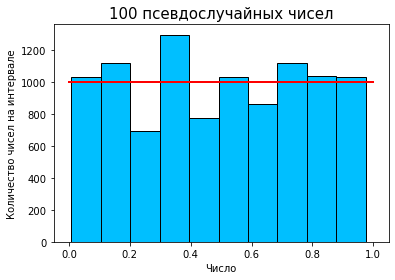

In [15]:
ax = plt.gca()
plt.title("10000 псевдослучайных чисел",
          fontsize = 15,
          color = 'black') 
plt.xlabel(r'Число',
           color = 'black') 
plt.ylabel(r'Количество чисел на интервале',
           color = 'black') 
plt.plot([0,1], [1000,1000], color='red', lw=2) 
n, bin, patches = plt.hist(numbers10000, 
                           bins = 10,
                           color = 'deepskyblue', 
                           edgecolor = 'black', 
                           linewidth = 1) 
plt.show

Аналогичну пункту (г) вычислим частоты  
  
**Теоретическая частота** равна $10 000 / 10 = 1000$  
**Наблюдаемые частоты** вычислим:

In [16]:
observed10000 = get_observed(numbers10000)

In [17]:
# Выводим результат
print('Ожидаемые частоты на выборке из 10000 элементов: ')
intervals = ['.{} - .{}'.format(i, i + 1) for i in range(9)]
intervals.append('.9 - 1')

display(pd.DataFrame([observed10000],
                    columns=intervals,
                    index=['Частота']))

Ожидаемые частоты на выборке из 10000 элементов: 


,.0 - .1,.1 - .2,.2 - .3,.3 - .4,.4 - .5,.5 - .6,.6 - .7,.7 - .8,.8 - .9,.9 - 1
Частота,1033,1121,778,1210,1034,861,860,1207,1120,776


Посчитаем статистику:

In [18]:
chi10000 = get_stat(1000, observed10000) # статистика

In [19]:
print('Статистика: {}'.format(chi10000))

Статистика: 256.616


Ранее мы нашли:  
$\chi^2(0.05,9)=16.9$

Проверим критическое правило:  
$\chi^2  < \chi^2_{9,0.05}$  ?  
$256.616 > 16.9$  
  
Следовательно, у нас есть значительные осноывания для опровержения основной гипотезы в пользу альтернативной  
Распределение последовательности **нельзя** считать равномерным

---
**е) Проверить тестом перестановок первые  9999  чисел последовательности, разбив их на тройки**  
Для начала разобьем числа на тройки и соберем в новый массив

In [20]:
triples = [[numbers10000[i], numbers10000[i + 1], numbers10000[i+ 2]]
          for i in range(0,9997,3)]

In [21]:
print('Собрано троек чисел: {}'.format(len(triples)))

Собрано троек чисел: 3333


Элементам каждой тройки поставим в соответствие ранг: 
- 1 — наименьшему элементу
- 2 — среднему
- 3 — наибольшему  
  
Напишем метод, который превращает тройку в строку идущих подряд рангов

In [22]:
def get_rangs(triple):
    rangs = ''
    minimum = min(triple)
    maximum = max(triple)
    for n in triple:
        if n == minimum:
            rangs += '1'
        elif n == maximum:
            rangs += '3'
        else:
            rangs += '2'
    return rangs

Переведем тройки в строки рангов и посчитаем частоты рангов

In [23]:
triples_rangs = [get_rangs(t) for t in triples]
observed_rangs = {'123': 0, '132': 0, '213': 0, '231': 0, '312': 0, '321': 0}

for r in triples_rangs:
    observed_rangs[r] += 1

In [24]:
# Выводим результат
print('Частоты на выборке из рангов троек: ')
display(pd.DataFrame([observed_rangs.values()],
                    columns=observed_rangs.keys(),
                    index=['Частота']))

Частоты на выборке из рангов троек: 


,123,132,213,231,312,321
Частота,602,627,491,374,518,721


**Теоретическую частоту** вычисляем как раньше:  
$3333/6 = 555.5$  
  
**Уровень значимости**, как и прежде, $\alpha = 0.05$  
**Степень свободы** $6-1=5$  
  
Вычисляем по таблице $\chi^2(0.05,5)=11.1$

Вычислим **статистику** с помощью ранее определенной фунукции:

In [25]:
chi_rangs = get_stat(555.5, observed_rangs.values())

In [26]:
print('Статистика: {}'.format(chi_rangs))

Статистика: 131.72547254725472


Проверим критическое правило:  
$\chi^2  < \chi^2_{5,0.05}$  ?  
$131.725 > 11.1$  
  
Следовательно, у нас есть значительные осноывания для опровержения основной гипотезы в пользу альтернативной  
Распределение последовательности **нельзя** считать равномерным, а числа независимыми

---
**P.S.** В целях повышения читабельности удалены фрагменты кода, предназначенные для вывода данных